# Finite Differences

<p align=justify>
The Finite Differences method enables the approximation of a differential by the ratio of the differences between a function in two different domain points and the points themselves. This is done by taking advantage of Taylor's series expansion of a function locally (around a given point of differentiation).
</p>

## Taylor's Series Expansion

A given function $f$ defined in $R \rightarrow R$ can be approximated by the following McLaurin's series expansion (which is just a fancy name for a Taylor's series expansion for a function around $x=0$):

$$ f(x + \delta) = f(x) + \delta f'(x) + \frac{\delta ^2}{2} f''(x) + ... + \frac{\delta ^n}{(n-1)!}\frac{d}{dx}f(x)$$

A possible first order approximation for $f(x)$ can be given by :

$$f(x+\delta) \approx f(x) + \delta f'(x) + E(\delta^2)$$

Which leads to the first order Finite Difference approximation of $f'(x)$:

Eq 1 : $$ f'(x) \approx \frac{f(x+\delta) - f(x)}{\delta} - E(\delta^2)$$



Where $E(\delta^2)$ is the second-order error inherent to the first-order Taylor's series approximation of $f(x)$.

## Maxwell Equations
Maxwell's equations are usually presented and used in differential form. It is only natual to use the Finite Differences method to solve them computationally. To do so, we need to define our Problem, define the geometry or Surface of our problem and then discretize this Surface into smaller cells, forming a cell grid. Each point defining the boundaries of each cell of the grid will be a possible point to be used in the Finite Differences method.

However, when the wavelength of the electromagnetic waves inherent to the problem fall sorther than the length of four grid cells, using the first-order approximation shown in Eq.1 is not remotely accurate. 



## Staggered Grids method

Another possible approximation is the "Staggered Grids" method to use the first-order approximation to apply the Finite Diff. method to compute the "half-grid" 
$$ x_{i+\frac{1}{2}} = x_i + \frac{h}{2}$$

Eq 2 : $$f'\left(x+\frac{h}{2}\right) = \frac{f(x+h) - f(x)}{h}- E(h^2)$$

## Second Derivative

Applying Eq.2 recursively leads ot the second derivative approximation of $f(x)$ using the Finite Differences method:

$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} - E(h^2)$$

## 2D Capacitance Extraction

In the vaccum region between the inner and outer conductors of the coaxial cable represented in the matplotlib image below, the electrostatic potential $\phi$ is constant through each conductor, and has a spatial variation inbetween the conductors.

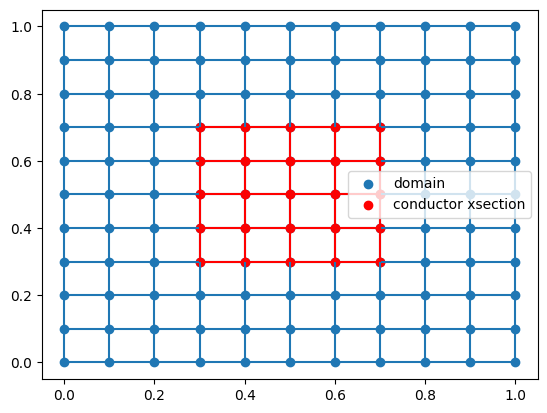

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

domain_bb = ((0,0),(1,1))
domain_np = (11,11)

x, y = np.meshgrid(
    np.linspace(
        domain_bb[0][0], 
        domain_bb[1][0], 
        domain_np[0]
    ), 
    np.linspace(
        domain_bb[0][1], 
        domain_bb[1][1], 
        domain_np[1]
    )
)

cond_bb = ((0.3,0.3),(0.7,0.7))
cond_np = (5,5)

xcond, ycond = np.meshgrid(
    np.linspace(
        cond_bb[0][0], 
        cond_bb[1][0], 
        cond_np[0]
    ), 
    np.linspace(
        cond_bb[0][1], 
        cond_bb[1][1], 
        cond_np[1]
    )
)



Considering the special electrostatics case of Faraday's Law $\phi$:

$$ \nabla \times \vec{E} = 0 $$

And considering also the relationship between the electric field and electric potential ($\phi$):

$$ \vec{E} = -\nabla \phi$$


We have the following electrostatics equation:

$$ \nabla \times (-\nabla \cdot \phi) = 0$$

Which can be rewritten as Laplace's equation (governing the coaxial cable):

$$ \nabla^2 \phi = 0$$

Let us now assume the geometry of the Problem can be fitted on a grid of squares so that we can apply the Finite Differences method to solve the Laplace's equation.

---
### Important Note:

Considering discretization cell geometries other than squares is possible, but are more suited to other methods such as the more general Finite Elements method must be used. Nonetheless, Finite Differences method can also be used with square cells of different sizes, providing a method of refining the grid in regions of interest.

---

### Problem Definition

Using a square grid we have that the $x$ and $y$ coordinates of each cell can be defined using a linear space:

$$ x_i = x_0 + ih_x$$
$$ y_j = y_0 + jh_y$$

Where $h_x$ and $h_y$ are the grid spacing in the $x$ and $y$ directions, respectively.

In this case, and considering $h_y = h_x$, the discretized Laplace's equation can be written as:

Eq 3: $$ \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \approx \frac{\phi_{i-1,j} + \phi_{i+1,j} + \phi_{i,j-1} + \phi_{i,j+1} - 4\phi_{i,j}}{h^2} = 0$$

### Jacobi Iteration

Eq. 3 magically states that the electric potential at a given point (in the iteration n+1) is the average of the electric potential of the four points surrounding it (computed in the previous n-th iteration). This method is known as the Jacobi iteration method, and it converges rather slowly.

Eq 4: $$\phi_{i,j}^{n+1} = \frac{1}{4}\left( \phi_{i-1,j}^n + \phi_{i+1,j}^n + \phi_{i,j-1}^n + \phi_{i,j+1}^n \right)$$

### Gauss-Seidel Iteration

A possible improvement to the Jacobi iteration method is the Gauss-Seidel iteration method, which uses the newly computed electric potential of the points surrounding the point of interest in the same iteration. This method converges faster than the Jacobi iteration method. A further improvement ot this method also introduces an overrelaxation factor $R$, which for $R>1$ can lead to faster convergence. The method proves unstable for $R>2$.

Eq 5: $$\phi_{i,j}^{n+1} = \phi_{i,j}^n + R\left( \frac{\phi_{i-1,j}^{n+1} + \phi_{i+1,j}^n + \phi_{i,j-1}^{n+1} + \phi_{i,j+1}^n}{4} - \phi_{i,j}^n\right)$$

An euristic estimate for the optimal value of $R$ is given by: 

$$ R_{opt} = 2 - \frac{\pi}{m}$$

Where $m$ is the number of grid points in the $x$ or $y$ direction.

### Boundary Conditions

As boundary conditions we can assume that the central conductor of the coaxial cable is at a constant potential of $\phi_1 = 1 V$ and the outter conductor shell is at a constant potential of $\phi_2 = 0 V$. 

These boundary conditions enable the computation of the charge ($Q$) per unit length, which can be used to compute the capacitance per unit length ($C$) of the coaxial cable:

$$ Q_z = \epsilon_0 \oint \vec{E} \cdot \vec{n_z}dl = -\epsilon_0 \oint \frac{\partial \phi}{\partial z}dl \rightarrow$$

$$\rightarrow Q_z = -\epsilon_0\frac{\partial }{\partial z} \oint \phi \hspace{0.1cm}dl \hspace{0.5cm} [C/m]$$

$$ C = Q / V$$

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
def gauss_seidel(f, mask, n, m):
    """Compute a single iteration of the Gauss Seidel method"""
    # Create slices to access neighboring elements
    f = f.copy()
    
    for i in range(1, n-1):
        for j in range(1, m-1):
            f[i,j] = f[i,j] + (0.25*(f[i-1,j] + f[i+1,j] + f[i,j-1] + f[i,j+1]) - f[i,j])*mask[i,j]
    # symmetry on the left boundary i-1 -> i+1
    i = 0
    for j in range(1, m-1):
        f[i,j] = f[i,j] + (0.25*(f[i-1,j] + f[i+1,j] + f[i,j-1] + f[i,j+1]) - f[i,j])*mask[i,j]
    # symmetry on the lower boundary j-1 -> j+1
    j = 0
    for i in range(1, n-1):
        f[i,j] = f[i,j] + (0.25*(f[i-1,j] + f[i+1,j] + f[i,j-1] + f[i,j+1]) - f[i,j])*mask[i,j]
    return f

def gauss_integral(f, n, m, hx, hy):
    """Compute the closed integral of f over the integration path."""
    integ = 0.0
    # integrate along the upper boundary
    for i in range(0, n):
        integ += 0.5*( f[i,m] + f[i+1,m] )
    # integrate along the right boundary
    for j in range(0, m):
        integ += 0.5*( f[n,j] + f[n,j+1] )
    
    # 4 symmetric quadrants
    return 4*integ
        

def capacitance(
    a: float,
    b: float,
    c: float,
    d: float,
    nx: int = 10,
    ny: int = 10,
    inner_cond_volt: float = 1.0,
    outter_cond_volt: float = 0.0,
    tol: float = 1e-9,
    rel: float = 2 - np.pi/10,
    max_iter: int = 2**10,
    verbose: bool = False
):
    """Compute the capacitance 
    per unit length of a coaxial 
    cable pair of rectangle conductors.

    Args:
        a (float): inner conductor width
        b (float): inner conductor height
        c (float): outter conductor width
        d (float): outter conductor height
        nx (int): number of points in the horizontal direction
        ny (int): number of points in the vertical direction
        inner_cond_volt (float, optional): voltage of the inner conductor. Defaults to 1.0.
        outter_cond_volt (float, optional): voltage of the outter conductor. Defaults to 0.0.
        tol (float, optional): relative tolerance for Gauss Seidel iteration. Defaults to 1e-6
        rel (float): relaxation parameter. Defaults to 2 - np.pi/n.
        max_iter (int, optional): maximum number of iterations. Defaults to 2**10.
    """
    hx = 0.5*c/nx
    hy = 0.5*d/ny
    na = round(0.5*a/hx)
    nb = round(0.5*b/hy)
    # linear spaces are only created for 
    # the top right quadrant of the whole domain, once 
    # we're assuming symmetry in the x and y directions
    x = np.linspace(0, 0.5*c, nx+1)
    y = np.linspace(0, 0.5*d, ny+1)
    
    # boundary conditions
    pot = np.zeros((nx+1, ny+1))
    # mask of the conductor region, signaling one
    # volt on the inner conductor
    pot[0:na+2, 0:nb+2] = inner_cond_volt
    pot[0:nx+2, -1] = outter_cond_volt
    pot[-1, 0:ny+2] = outter_cond_volt
    # mask of the vacuum region, signaling one 
    # on the vacuum region and zero on the conductors regions
    mask = np.ones((nx+1, ny+1))*rel
    mask[0:na+2, 0:nb+2] = 0
    # Gauss Seidel iteration
    old_cap = 0.0
    cap = 0.0
    for i in range(max_iter):
        pot = gauss_seidel(pot, mask, nx+1, ny+1)
        # compute charge per unit length using gauss theorem
        q = gauss_integral(pot, nx-1, ny-1, hx, hy)
        cap = q/(inner_cond_volt - outter_cond_volt)
        # compute cap in pF/m = 1e12*epsilon_0 = 8.854187
        cap = cap*8.854187
        if abs(cap - old_cap)/cap < tol:
            break
        old_cap = cap
    if verbose:
        plt.clf()
        sns.heatmap(pot[::-1,:],)
    return cap

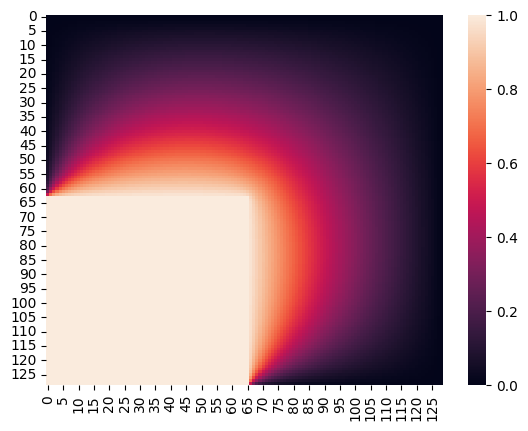

In [144]:
# test the capacitance extraction function
nx = [2**i for i in range(3, 8)]
ny = [2**i for i in range(3, 8)]
a = 1.0
b = 1.0
c = 2.0
d = 2.0
cap = np.zeros(len(nx))
for i in range(len(nx)):
    cap[i] = capacitance(a, b, c, d, nx[i], ny[i], rel=2 - np.pi/nx[i], verbose=True)

In [145]:
from prettytable import PrettyTable
tab = PrettyTable(["n", "h [m]", "C [pF/m]"])
for row in zip(nx, a/np.array(nx), cap):
    tab.add_row(row)
print(tab)

+-----+-----------+--------------------+
|  n  |   h [m]   |      C [pF/m]      |
+-----+-----------+--------------------+
|  8  |   0.125   | 124.42974591941292 |
|  16 |   0.0625  | 89.13916690525464  |
|  32 |  0.03125  | 73.55071666894435  |
|  64 |  0.015625 | 66.28313764757317  |
| 128 | 0.0078125 | 62.78478558004716  |
+-----+-----------+--------------------+


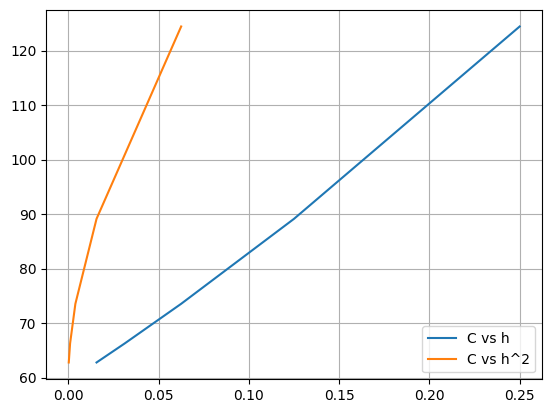

In [146]:
# plot Capacitance vs. h
plt.clf()
plt.plot(c/np.array(nx), cap, label='C vs h')
plt.plot((c/np.array(nx))**2, cap, label='C vs h^2')
plt.grid(True)
plt.legend()
plt.show()